In [1]:
#--------Import packages
#--------For Netcdf manipulation
import statsmodels.tsa.stattools
import xarray as xr
from netCDF4 import Dataset
import netCDF4 as nc

#--------For array manipulation
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Grouper

#--------For plotting
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import matplotlib.pylab as plt
from mpl_toolkits.basemap import Basemap # plots maps
from matplotlib.cbook import dedent
#import cmocean
import seaborn as sns

 # Ross-Amundsen Regions

## SAM

In [2]:
#-----Read in volume dataset as dataframe
vol_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/CCF/vol_mean_ra.csv')
#-----Read in SAM as dataframe
sam_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/sam_long.csv',parse_dates=['Dates'])
#-----Read in dates  as dataframe
dates_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/CCF/dates_df.csv')

In [3]:
dates_df['Dates'] = dates_df['Dates'].astype('datetime64[ns]')
sam_df = sam_df.drop(["Years", "Months"], axis=1)

# Get dates  for only May -October
sam_df = sam_df[(sam_df.Dates.dt.month >= 5) & (sam_df.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
sam_df = sam_df.set_index('Dates')
sam_df = sam_df.loc['2002-05-01':'2018-10-01']
## Removing the first 5 rows/dates
sam_df  = sam_df.iloc[5:]

In [4]:
# we now want the 'Dates' as a normal column and not an index
sam_df = sam_df.reset_index()
# Combining the SAM and SIV Dates
df_new = sam_df.copy()
df_new["SIV"] = vol_df["SIV"]

In [5]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   97 non-null     datetime64[ns]
 1   SAM     97 non-null     float64       
 2   SIV     97 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.4 KB


## ASL

In [6]:
#-----Read in ASL as dataframe
asl_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/ASL_index.csv')

In [7]:
asl_df = asl_df.drop(["Lon", "Lat","SectorPres", "RelCenPres"], axis=1)
asl_df['Dates'] = asl_df['Dates'].astype('datetime64[ns]')
#print(asl_df)

In [8]:
# Get dates  for only May -October
asl_df = asl_df[(asl_df.Dates.dt.month >= 5) & (asl_df.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
asl_df = asl_df.set_index('Dates')
asl_df = asl_df.loc['2002-05-01':'2018-10-01']
# ## Removing the first 5 rows/dates
#asl_df  = asl_df.iloc[5:]

In [9]:
# # we now want the 'Dates' as a normal column and not an index
asl_df = asl_df.reset_index()

In [10]:
# # Combining the SAM and SIV Dates
df_new_asl = asl_df.copy()
df_new_asl["SIV"] = vol_df["SIV"]

## SOI

In [11]:
#-----Read in SOI as dataframe
soi_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/SOI_index.csv')

In [12]:
# have to use pandas melt to go from wide to long data
soi_melt = pd.melt(soi_df, id_vars='Years')
soi_melt = soi_melt.rename(columns={"variable":"Month"})
soi_melt['Dates'] = pd.to_datetime(soi_melt[['Years', 'Month']].assign(DAY=1))

In [13]:
soi_melt = soi_melt.drop(["Years", "Month"], axis=1)
soi_melt['Dates'] = soi_melt['Dates'].astype('datetime64[ns]')

In [14]:
# Get dates  for only May -October
soi_melt = soi_melt[(soi_melt.Dates.dt.month >= 5) & (soi_melt.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
soi_melt = soi_melt.set_index('Dates')
soi_melt = soi_melt.loc['2002-05-01':'2018-10-01']
# ## Removing the first 5 rows/dates
soi_melt  = soi_melt.iloc[5:]

In [15]:
# # we now want the 'Dates' as a normal column and not an index
soi_melt = soi_melt.reset_index()
soi_melt.rename(columns={'SOI': 'value'}, inplace=True)

# # Combining the SAM and SIV Dates
df_new_soi = soi_melt.copy()
df_new_soi["SIV"] = vol_df["SIV"]

In [16]:
df_new_soi.reset_index()
df_new_soi.rename(columns = {'value':'SOI'}, inplace = True)

In [17]:
from pandas.api.types import CategoricalDtype
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def month_ccf_sam(df1,df2,df3):
    x = [5,6,7,8,9,10]
    ind0 = 0
    result1 = []
    result2 = []
    result3 = []
    for i in x:
        #SAM
        df_selmon = df1[df1['Dates'].dt.month.isin([i])]
        cor_df = df_selmon['SAM'].corr(df_selmon['SIV'])
        result1.append(cor_df)
        #ASL
        df_selmon2 = df2[df2['Dates'].dt.month.isin([i])]
        cor_df2 = df_selmon2['ActCenPres'].corr(df_selmon2['SIV'])
       # print(cor_df2)
        result2.append(cor_df2)
        #SOI
        df_selmon3 = df3[df3['Dates'].dt.month.isin([i])]
        cor_df3 = df_selmon3['SOI'].corr(df_selmon3['SIV'])
       # print(cor_df3)
        result3.append(cor_df3)

    result1 = pd.DataFrame(result1, columns=['SAM'])
   # print(result1)
    result2 = pd.DataFrame(result2, columns=['ASL'])
    #print(result2)
    result3 = pd.DataFrame(result3, columns=['SOI'])
    #print(result3)
    months = ['5','6','7','8','9','10']
    #pd.to_datetime(months,unit='%B')
    df_months = pd.DataFrame(months, columns=['Months']).astype('int32')
    print((df_months.info()))
    bigdata = pd.concat([df_months, result1,result2,result3],axis=1)
    bigdata = pd.melt(bigdata, id_vars=['Months'], var_name='Index', value_name='corr')
    data = bigdata.pivot("Index", "Months", "corr")
    sns.heatmap(data,annot=True,linewidths=.5)
    plt.savefig('/Users/fridaperez/Developer/repos/local_repo/pub_plots/Ross_amudsen/heatmap.png',dpi=300)
    print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Months  6 non-null      int32
dtypes: int32(1)
memory usage: 152.0 bytes
None
Months        5         6         7         8         9         10
Index                                                             
ASL     0.303389  0.111757  0.211740 -0.026667  0.192119  0.457035
SAM     0.112225  0.044889 -0.206596  0.006209 -0.099024 -0.028048
SOI     0.206514  0.354309  0.240010  0.141167 -0.237642 -0.214575


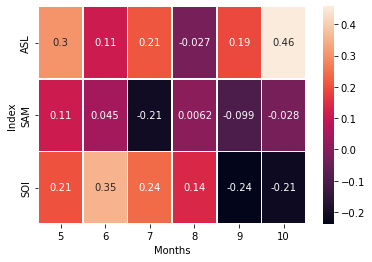

In [18]:
month_ccf_sam(df_new,df_new_asl,df_new_soi)